# Import Necessary Data 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
import warnings 
warnings.filterwarnings('ignore')

# Import Data

In [2]:
xls = pd.ExcelFile('EastWestAirlines.xlsx')
xls

In [3]:
airline_data = pd.read_excel(xls,'data')

In [4]:
airline_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Data Understanding

In [5]:
airline_data.shape

(3999, 12)

In [6]:
airline_data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
airline_data.describe(include='all')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [8]:
airline_data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

# Data Preprocessing

In [9]:
airline_data = airline_data.drop(labels='ID#',axis=1)
airline_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [10]:
airline_data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [11]:
scaler = StandardScaler()
scaler = scaler.fit_transform(airline_data)
scaler

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [12]:
scaled_airline_data = pd.DataFrame(data=scaler,columns=airline_data.columns)

In [13]:
scaled_airline_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


# Hierarchical Clustering


# model Building

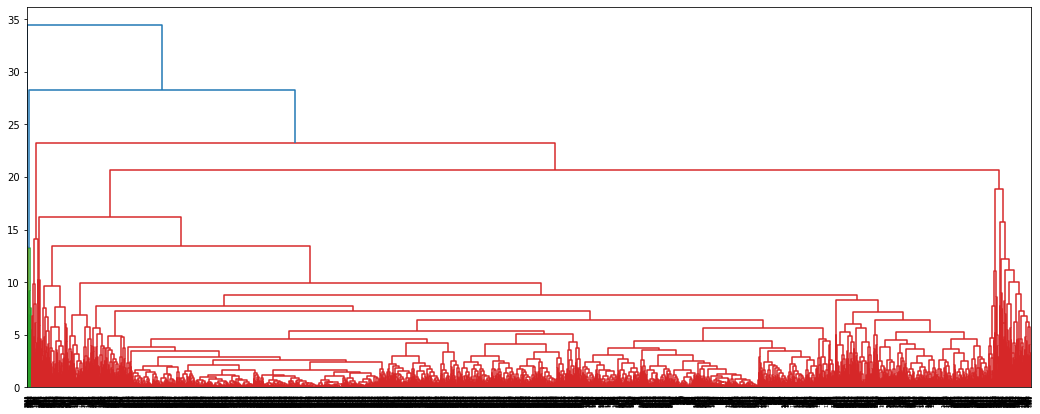

In [14]:
plt.figure(figsize=(18,7))
dendogram = sch.dendrogram(sch.linkage(scaled_airline_data,method='complete'))

In [15]:
hc = AgglomerativeClustering( n_clusters=5,affinity='euclidean',linkage='complete')

In [16]:
y_hc = hc.fit_predict(scaled_airline_data)
y_hc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [17]:
clusters = pd.DataFrame(data=y_hc,columns=['Clusters'])
clusters

,Clusters
0,1
1,1
2,1
3,1
4,1
...,...
3994,1
3995,1
3996,1
3997,1


In [18]:
airline_data['Hierarchical_Clusters'] = clusters

In [19]:
airline_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [20]:
airline_data[airline_data['Hierarchical_Clusters']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Clusters
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0
42,60313,0,1,1,1,10000,26,3250,9,7829,1,0
50,108137,0,1,1,1,6368,5,6368,5,6844,0,0
59,95118,0,3,1,1,23188,23,2200,7,6865,1,0
65,53914,0,3,1,1,33767,45,5550,29,6826,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3883,126167,0,5,1,1,190160,15,0,0,1612,1,0
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,0
3934,76595,0,1,1,1,10577,2,9577,1,1515,0,0
3950,59650,0,1,1,1,5050,16,3950,13,1476,0,0


In [21]:
airline_data[airline_data['Hierarchical_Clusters']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [22]:
airline_data[airline_data['Hierarchical_Clusters']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Clusters
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,2
384,28193,0,5,1,4,103456,32,0,0,6980,1,2
850,25629,0,4,1,5,107308,36,600,2,5966,1,2
904,15835,0,2,1,5,112171,16,0,0,5825,1,2
1036,154664,0,4,1,3,73881,33,0,0,5769,0,2
1244,166465,0,4,1,4,98717,30,0,0,5531,0,2
1300,737514,0,3,1,4,43993,40,2150,7,5030,0,2
1878,128302,0,5,1,4,132263,32,400,2,4103,1,2
1917,82981,0,5,1,3,105325,44,1000,2,3964,1,2
1946,126873,0,4,1,5,95598,32,500,1,3880,1,2


In [23]:
airline_data[airline_data['Hierarchical_Clusters']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Clusters
2015,53232,888,4,1,1,80696,65,22100,45,3831,1,3
3235,287033,0,1,1,1,26161,58,12873,53,2272,1,3
3583,160114,500,1,1,1,71954,86,30817,53,1373,1,3
3594,27619,0,4,1,1,83726,68,14050,46,1325,1,3


In [24]:
airline_data[airline_data['Hierarchical_Clusters']==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Clusters
43,619393,0,3,1,1,15008,14,0,0,7819,1,4
72,550367,0,3,1,1,12500,13,50,1,7801,0,4
87,609477,0,3,1,1,21422,22,1200,8,6820,0,4
117,969559,0,1,1,1,2500,3,1000,2,7718,1,4
126,602064,0,5,1,1,194753,26,2250,10,7652,1,4
151,930410,0,5,1,1,211284,18,2250,6,7640,1,4
175,451673,0,4,1,1,43533,19,900,4,7575,1,4
186,707079,0,4,1,1,57173,40,3450,12,7523,1,4
220,1302051,2706,5,1,1,90653,32,3050,7,7467,1,4
275,1704838,0,1,1,1,17108,32,4823,23,7283,1,4


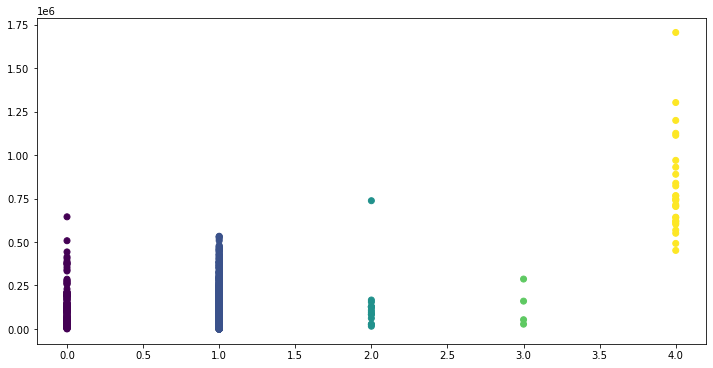

In [25]:
plt.figure(figsize=(12,6))
plt.scatter(airline_data['Hierarchical_Clusters'],airline_data['Balance'],c=hc.labels_)
plt.show()

# KMEANS Clustering

##  Model Building

Since we already converted the data to same scale using Standerd Scaler now we have to find optimal number of clusters

### Using Elbow Method 

In [26]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=15)
    kmeans = kmeans.fit(scaled_airline_data)
    wcss.append(kmeans.inertia_)

In [27]:
wcss

[43988.99999999999,
 35409.5166298613,
 30899.246824652197,
 27153.906573073196,
 24883.74003885289,
 21089.781669832144,
 18891.78672300184,
 17316.78205595397,
 15960.460988755098,
 14903.581851133165]

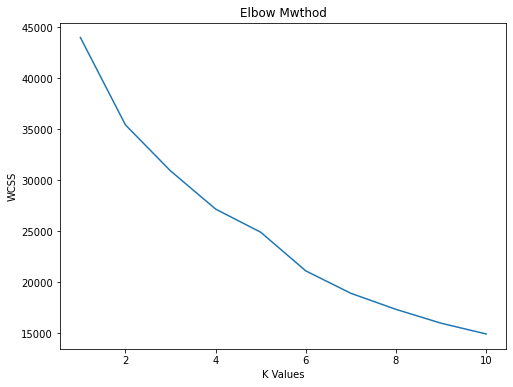

In [28]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss)
plt.title('Elbow Mwthod')
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.show()

### Till k=4 there is a rapid change in wcss so we take number of clusters as 4 

In [29]:
kmeans_clustering = KMeans(n_clusters=4,random_state=15)
kmeans_clustering.fit(scaled_airline_data)

KMeans(n_clusters=4, random_state=15)

In [30]:
kmeans_clustering.predict(scaled_airline_data)

array([0, 0, 0, ..., 3, 0, 0])

In [31]:
airline_data['Kmeans_Clusters'] = kmeans_clustering.labels_

In [32]:
airline_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Clusters,Kmeans_Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [33]:
kmeans_clustering.cluster_centers_

array([[-0.29559917, -0.06482832, -0.6057294 ,  0.03196872, -0.06075696,
        -0.51406585, -0.48556683, -0.18666169, -0.19904548, -0.20494834,
        -0.35015209],
       [ 1.19834441,  0.82002725,  0.06242226,  0.14807116, -0.06276658,
         0.58267436,  1.59217228,  3.53177027,  3.79414404,  0.28312709,
         0.9023012 ],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 0.43004698,  0.02457432,  1.19556952, -0.08224124, -0.05469962,
         0.9185175 ,  0.74746631, -0.08459908, -0.09414352,  0.3717317 ,
         0.58157092]])

In [34]:
airline_data.groupby('Kmeans_Clusters').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Clusters
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Clusters,,,,,,,,,,,,
0,43799.377307,94.039262,1.224578,1.019238,1.000393,4719.105222,6.933255,198.879073,0.619160,3695.224578,0.201021,0.985866
1,194350.181818,778.460606,2.145455,1.036364,1.000000,31215.236364,26.890909,5404.654545,15.763636,4703.181818,0.806061,0.515152
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,2.000000
3,116852.196541,162.867925,3.703616,1.002358,1.001572,39295.005503,18.772799,341.077044,1.014937,4884.551101,0.650943,1.029874


In [35]:
airline_data[airline_data['Kmeans_Clusters']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Clusters,Kmeans_Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
5,16420,0,1,1,1,0,0,0,0,6942,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397,0,1,0
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [36]:
airline_data[airline_data['Kmeans_Clusters']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Clusters,Kmeans_Clusters
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0,1
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,1,1
42,60313,0,1,1,1,10000,26,3250,9,7829,1,0,1
50,108137,0,1,1,1,6368,5,6368,5,6844,0,0,1
65,53914,0,3,1,1,33767,45,5550,29,6826,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,126490,0,1,1,1,8808,15,5183,12,1566,0,1,1
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,1,1
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,0,1
3934,76595,0,1,1,1,10577,2,9577,1,1515,0,0,1


In [37]:
airline_data[airline_data['Kmeans_Clusters']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Clusters,Kmeans_Clusters
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,2,2
384,28193,0,5,1,4,103456,32,0,0,6980,1,2,2
850,25629,0,4,1,5,107308,36,600,2,5966,1,2,2
904,15835,0,2,1,5,112171,16,0,0,5825,1,2,2
1036,154664,0,4,1,3,73881,33,0,0,5769,0,2,2
1244,166465,0,4,1,4,98717,30,0,0,5531,0,2,2
1300,737514,0,3,1,4,43993,40,2150,7,5030,0,2,2
1878,128302,0,5,1,4,132263,32,400,2,4103,1,2,2
1917,82981,0,5,1,3,105325,44,1000,2,3964,1,2,2
1946,126873,0,4,1,5,95598,32,500,1,3880,1,2,2


In [38]:
airline_data[airline_data['Kmeans_Clusters']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Clusters,Kmeans_Clusters
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3
6,84914,0,3,1,1,27482,25,0,0,6994,0,1,3
9,104860,0,3,1,1,28426,28,1150,3,6931,1,1,3
11,96522,0,5,1,1,61105,19,0,0,6924,1,1,3
15,28495,0,4,1,1,49442,15,0,0,6912,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,57793,0,3,1,1,20959,15,1198,3,1424,1,1,3
3980,28867,0,3,1,1,19169,28,0,0,1425,0,1,3
3985,59017,0,4,1,1,34746,25,0,0,1418,0,1,3
3991,39142,0,3,1,1,14981,28,0,0,1408,0,1,3


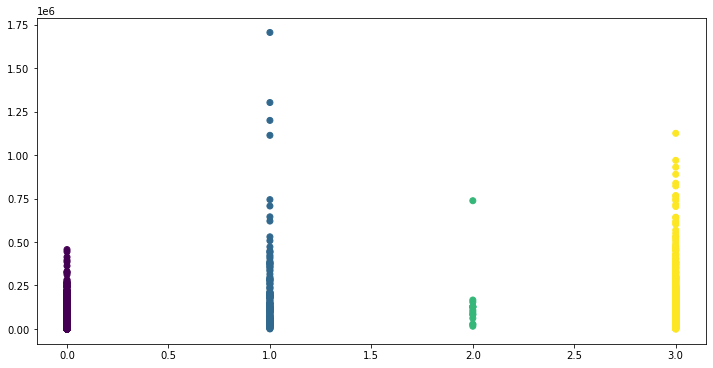

In [39]:
plt.figure(figsize=(12,6))
plt.scatter(airline_data['Kmeans_Clusters'],airline_data['Balance'],c=kmeans_clustering.labels_)
plt.show()

# DBSCAN Clustering

In [40]:
dbscan_clustering = DBSCAN(eps=0.8,min_samples=6)
dbscan_clustering.fit(scaled_airline_data)

DBSCAN(eps=0.8, min_samples=6)

In [41]:
dbscan_clustering = dbscan_clustering.fit(scaled_airline_data)
dbscan_clustering

DBSCAN(eps=0.8, min_samples=6)

In [42]:
dbscan_clustering.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [43]:
dbscan_clusters = pd.DataFrame(dbscan_clustering.labels_,columns=['Dbscan_Clusters'])
dbscan_clusters

,Dbscan_Clusters
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [44]:
airline_data['Dbscan_clusters'] = dbscan_clusters

In [45]:
airline_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Clusters,Kmeans_Clusters,Dbscan_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,3,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0,0


In [46]:
airline_data[airline_data['Dbscan_clusters']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Clusters,Kmeans_Clusters,Dbscan_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,11310,0,1,1,1,5021,2,0,0,1409,0,1,0,0
3992,11181,0,1,1,1,929,12,0,0,1407,0,1,0,0
3993,3974,0,1,1,1,365,3,0,0,1397,0,1,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0,0


In [47]:
airline_data[airline_data['Dbscan_clusters']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Clusters,Kmeans_Clusters,Dbscan_clusters
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3,-1
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0,1,-1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,1,3,-1
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,1,1,-1
22,20584,0,1,1,1,3450,11,3450,11,6884,0,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,59927,739,1,1,1,3100,3,0,0,1464,1,1,0,-1
3954,33972,0,3,1,1,21029,29,0,0,1467,1,1,3,-1
3956,47301,1005,1,1,1,4561,4,0,0,1464,0,1,0,-1
3961,131125,862,1,1,1,4993,11,50,1,1443,0,1,0,-1


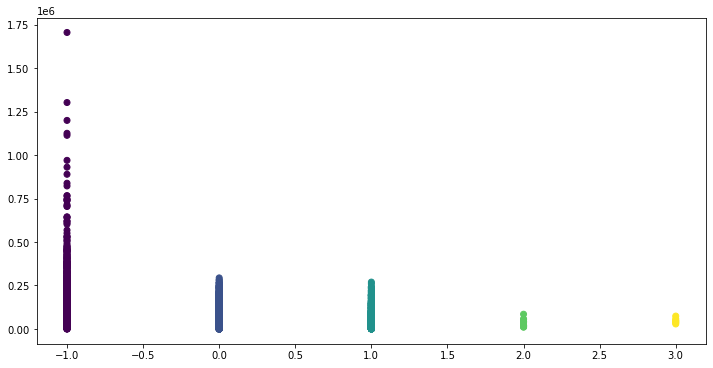

In [48]:
plt.figure(figsize=(12,6))
plt.scatter(airline_data['Dbscan_clusters'],airline_data['Balance'],c=dbscan_clustering.labels_)
plt.show()

# ==========================THE END=========================== 